# Análisis Exploratorio - Dataset de geolocalización Olist

El Código postal de Brasil se compone de 8 dígitos con el objetivo que una guía acelerada para la distribución de objetos a través de correo. Se divide en 2 partes:  
**Parte 1: 5 dígitos**  
1) *Región:* Centro-oeste, Nordeste, Norte, Sudeste, Sur
2) *Sub-region:* Representan los estados de Brasil. Son 26 estados y 1 distrito federal. Cada uno con su abreviatura y cuenta con un rango específico de código
3) *Sector:* Representan las ciudades pertenecientes a cada estado
4) *Sub-sector* 
5) *Sub-sector-divider*

**Parte 2: 3 dígitos**  
Representa el área de distribución

Para este dataset en particular nos interesa la parte de 5 dígitos, y en particular hasta los 3 primeros que identifican las ciudades de cada estado.

Links:
* [Link1](https://en.youbianku.com/brazil)
* [Link2](https://bra.postcodebase.com/city-text)


![Zipcode](https://youbianku.com/files/images/bra.jpg)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# opciones de visualización de pandas
#pd.options.display.max_rows = 50
pd.options.display.float_format = '{:.2f}'.format

In [4]:
#Dataset
df = pd.read_csv('./datasets/olist_geolocation_dataset.csv',dtype={'geolocation_zip_code_prefix': str})

In [17]:
#Agregamos una columna de Zipcode como numero para analizar distribución
df['zip_code_int']=df['geolocation_zip_code_prefix'].astype('int32')

In [4]:
df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zip_code_int
0,01037,-23.55,-46.64,sao paulo,SP,1037
1,01046,-23.55,-46.64,sao paulo,SP,1046
2,01046,-23.55,-46.64,sao paulo,SP,1046
3,01041,-23.54,-46.64,sao paulo,SP,1041
4,01035,-23.54,-46.64,sao paulo,SP,1035
5,01012,-23.55,-46.64,são paulo,SP,1012
6,01047,-23.55,-46.64,sao paulo,SP,1047
7,01013,-23.55,-46.63,sao paulo,SP,1013
8,01029,-23.54,-46.63,sao paulo,SP,1029
9,01011,-23.55,-46.64,sao paulo,SP,1011


## Tipo de dato y shape

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
 5   zip_code_int                 1000163 non-null  int32  
dtypes: float64(2), int32(1), object(3)
memory usage: 42.0+ MB


In [6]:
df.shape

(1000163, 6)

* El dataset cuenta con un poco mas de 1 millon de registros
* En cuanto a los tipos de datos, los campos de latitud y longitud son flotantes, ciudad y estado de tipo string. En el caso del zip code se decidió dejar una columna como string para mantener los ceros del inicio, y otro campo colocarlo como entero para hacer algun tipo de gráfico

## Valores nulos y duplicados

**Valores nulos**

In [5]:
df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**Duplicados**  
Me interesa que los zip codes sean unicos, por lo que verifico solo duplicados en la columna _geolocation_zip_code_prefix_

In [22]:
# Cuenta de Registros duplicados totales
registros_duplicados = df.duplicated().sum()
registros_duplicados

261831

In [23]:
# Cuenta de duplicados por zipcode
zipcode_duplicados = df.duplicated(subset=['geolocation_zip_code_prefix']).sum()
zipcode_duplicados

981148

In [24]:
# Porcentaje de duplicados
print(f'Porcentaje de registros duplicados: {round(registros_duplicados/df.shape[0]*100,2)} %')
print(f'Porcentaje de zipcodes duplicados: {round(zipcode_duplicados/df.shape[0]*100,2)} %')

Porcentaje de registros duplicados: 26.18 %
Porcentaje de zipcodes duplicados: 98.1 %


In [ ]:
# Elimino duplicados
df.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep = 'first', inplace=True)

In [27]:
# Verifico la forma del dataframe
df.shape

(19015, 6)

* No hay valores nulos en el dataset
* Hay registros duplicados en el dataset, siendo un 26 % de regitros iguales, mientras que los códigos postales duplicados llegarían al 98% del total de registros
* Al dejar los codigos postales únicos, solo quedan 19015 registros

## Análisis de variables

### Variables numéricas

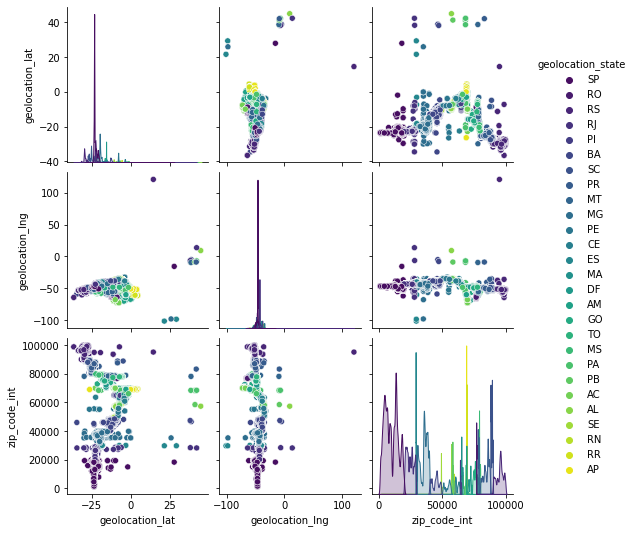

In [12]:
#Pairplot para variables cuantitativas. con un hue en stay y sample del 10% datos
sns.pairplot(df.sample(frac=0.8), hue="geolocation_state", palette = 'viridis')
plt.show()

Observando la tercera columna se puede observar que:
* Para cada state le pertenece mas o menos un rango definido de zipcode
* En los gráficos de dispersión de latitud y longitud respecto al zipcode se pueden ver algunos puntos outliers, especialmente para latitud, lo que podría significar que esos puntos estén fuera de Brasil

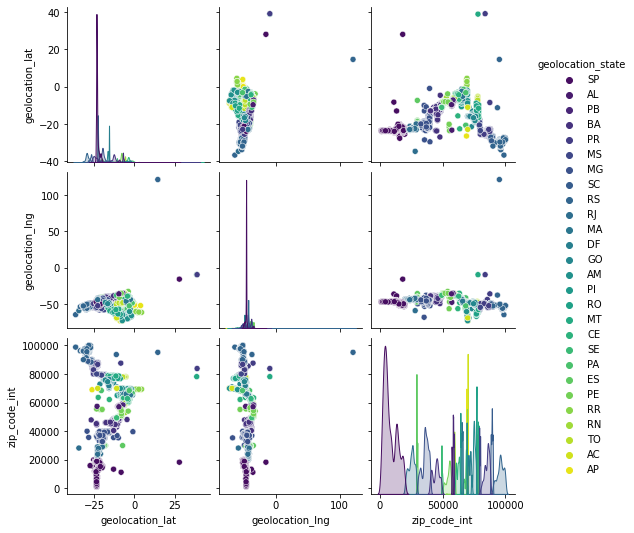

In [28]:
#Pairplot para variables cuantitativas. con un hue en stay y sample del 10% datos
sns.pairplot(df.sample(frac=0.8), hue="geolocation_state", palette = 'viridis')
plt.show()

### Variables categóricas
* geolocation_city
* geolocation_state

#### geolocation_city

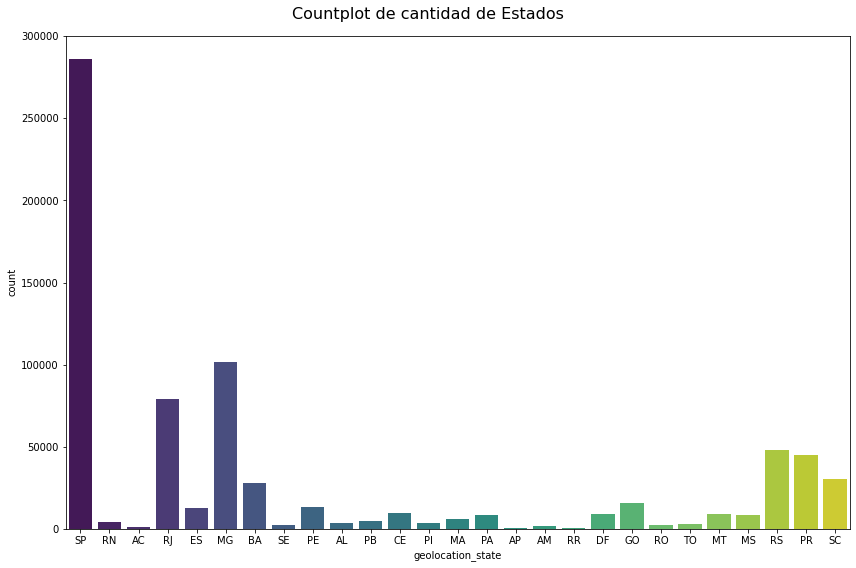

In [ ]:
# Ploteo de Estados
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(data = df, x = 'geolocation_state', ax = ax, palette = 'viridis')
fig.suptitle('Countplot de cantidad de Estados', fontsize=16,fontweight=200)
plt.tight_layout()
plt.show()

* Sao Paulo, Mina Gerais y Rio de Janeiro son los estados que cuentan con más cantidad de subdivisiones con alcance postal

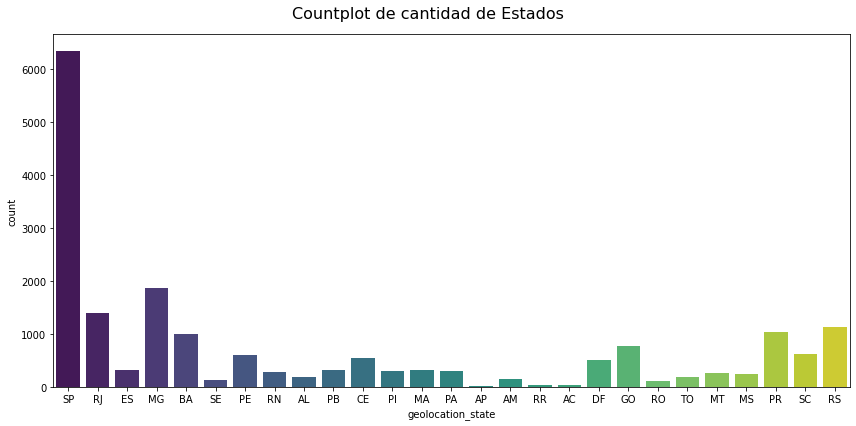

In [29]:
# Ploteo de Estados
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(data = df, x = 'geolocation_state', ax = ax, palette = 'viridis')
fig.suptitle('Countplot de cantidad de Estados', fontsize=16,fontweight=200)
plt.tight_layout()
plt.show()

####  geolocation_state

In [11]:
# Cantidad subdivisiones postales por ciudad
df['geolocation_city'].value_counts().sort_values(ascending=False).to_frame()

,geolocation_city
sao paulo,79927
rio de janeiro,35177
são paulo,19718
belo horizonte,19474
curitiba,11263
...,...
carabuçu,1
sao vicente do grama,1
tres aliancas,1
santa lucia do piai,1


In [30]:
# Cantidad subdivisiones postales por ciudad
df['geolocation_city'].value_counts().sort_values(ascending=False).to_frame()

,geolocation_city
sao paulo,2652
são paulo,528
rio de janeiro,400
brasilia,393
salvador,275
...,...
capao do leao,1
coqueiro baixo,1
arambaré,1
cristal,1


* Al realizar un conteo de sub sectores por ciudad se pueden ver algunas inconsistencias con los nombres, por ejemplo las categorías sao paulo y são paulo deberían agruparse como una misma categoría. Hay que hacerse algunas transformaciones en los nombres para lograr una consistencia en los datos

### 1 - geolocation_zip_code_prefix

Describe de zipcode

In [12]:
df['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,geolocation_zip_code_prefix
count,19015.00
mean,38.83
std,50.88
min,1.00
25%,8.00
50%,23.00
75%,49.00
max,779.00


In [ ]:
#Trasformación de longitud y latitud en 
from datashader.utils import lnglat_to_meters as webm
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

In [ ]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img